## For each of the following questions, formulate a null and alternative hypothesis (be as specific as you can be), then give an example of what a true positive, true negative, type I and type II errors would look like. Note that some of the questions are intentionally phrased in a vague way. It is your job to reword these as more precise questions that could be tested.

### Has the network latency gone up since we switched internet service providers?

Ho - There is no difference in network latency since we switched internet service providers

Ha - There is a difference in network latency since we switched internet service providers

true positive- the Ho is true and we choose to not reject it
true negative- the Ha is true and we choose to reject the Ho
type 1 error- There is no difference in network latency, but we said there was.
type 2 error- There is a difference in network latency, but we said there wasn't.

### Is the website redesign any good?

Ho - We are not getting more click throughs (website traffic) after the redesign than before

Ha - We are getting more click throughs (website traffic) after the redesign than before

true positive- the Ho is true and we choose to not reject it
true negative- the Ha is true and we choose to reject the Ho
type 1 error- There is no increase in web traffic, but we thought there was.
type 2 error- There is an increase in web traffic, but we said there wasn't.

### Is our television ad driving more sales?

Ho - We are not seeing an increase in sales within 24 hours after our TV ad airs during an episode of Walker Texas Ranger than if our ad does not air during an episode of Walker Texas Ranger.

Ha - We are seeing an increase in sales within 24 hours after our TV ad airs during an episode of Walker Texas Ranger than if our ad does not air during an episode of Walker Texas Ranger.

true positive- the Ho is true and we choose to not reject it
true negative- the Ha is true and we choose to reject the Ho
type 1 error- We claim with confidence that there is an increase in sales within 24 hours after our ad airs when there is indeed no increase. It may have been the weather... We falsly rejected the Ho.
type 2 error- There was an increase in sales, but we chose to accept the Ho and thought there was no increase. We falsly did not reject our Ho.

## Answer with the type of test you would use (assume normal distribution):

Is there a difference in grades of 
students on the second floor compared to grades of all students?

Type of test- two tail t-test(1 sample t-test)

Are adults who drink milk taller than adults who dont drink milk?

Type of test- one tail t-test (2 sample t-test)

Is the the price of gas higher in texas or in new mexico?

Type of test- independent t-test(2 sample t-test)

Are there differences in stress levels between students who take data science vs 
students who take web development vs students who take cloud academy?

Type of test- ANOVA

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
np.random.seed(8675309)

### Ace Realty wants to determine whether the average time it takes to sell homes is different for its two offices. A sample of 40 sales from office #1 revealed a mean of 90 days and a standard deviation of 15 days. A sample of 50 sales from office #2 revealed a mean of 100 days and a standard deviation of 20 days. Use a .05 level of significance.

In [118]:
#Ho - there is no difference
#Ha - there is a difference
alpha = .05

In [119]:
office_a = np.random.normal(90, 15, 40)
office_b = np.random.normal(100, 20, 50)


In [120]:
office_a.var()

145.6766034205988

In [121]:
office_b.var()

285.9021551305127

In [122]:
t, p = stats.ttest_ind(office_a, office_b, equal_var = False)
print(t, p)

-3.128226866077665 0.0023926267265584737


In [123]:
if p < alpha:
    print('There is a difference in the time it takes to sell homes between the offices!')
else:
    print('There is no difference in the time it takes to sell homes!')

There is a difference in the time it takes to sell homes between the offices!


In [124]:
from pydataset import data

mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


## Is there a difference in fuel-efficiency in cars from 2008 vs 1999?

In [125]:
mpg['fuel_efficiency'] = (mpg.cty+mpg.hwy) / 2
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0


In [126]:
#Ho - there is no difference
#Ha - there is a difference

y2008 = mpg[mpg['year']==2008].fuel_efficiency
y1999 = mpg[mpg['year']==1999].fuel_efficiency

<AxesSubplot:>

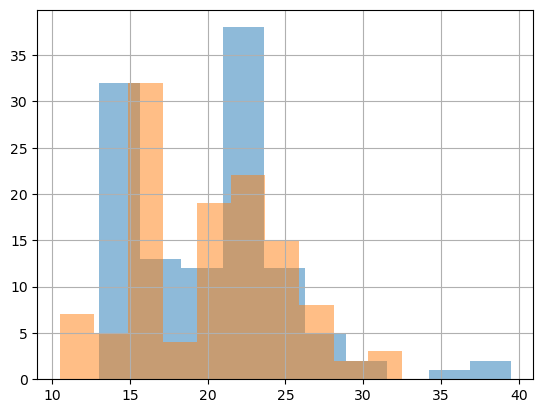

In [127]:
y1999.hist(alpha=.5)
y2008.hist(alpha=.5)

In [128]:
print(y1999.var())
print(y2008.var())

27.122605363984682
24.097480106100797


In [129]:
s, p = stats.ttest_ind(y1999, y2008, equal_var=False)

if p < alpha:
    print(f'there is a significant difference (pvalue: {p}')
else:
    print(f'there is not a significant difference (pvalue: {p})')

there is not a significant difference (pvalue: 0.8263750772060638)


## Are compact cars more fuel-efficient than the average car?

<AxesSubplot:>

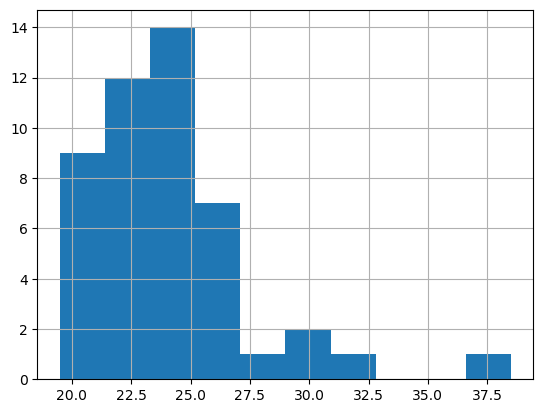

In [130]:
compact = mpg[mpg['class']=='compact'].fuel_efficiency
compact.hist()

In [131]:
compact.value_counts().sum()

47

In [132]:
overall_mean = mpg['fuel_efficiency'].mean()

t, p = stats.ttest_1samp(compact, overall_mean)

if p/2 < alpha:
    print(f'there is a significant difference (pvalue: {p/2}')
else:
    print(f'there is not a significant difference (pvalue: {p/2})')

there is a significant difference (pvalue: 2.0992818971585743e-10


## Do manual cars get better gas mileage than automatic cars?

In [133]:
automatic = mpg[mpg['trans'].str.startswith('auto')]
automatic.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact,23.5
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact,25.5
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact,21.0
7,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact,22.5
9,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact,20.5


In [134]:
manual = mpg[mpg['trans'].str.startswith('manual')]
manual.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class,fuel_efficiency
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact,25.0
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact,25.5
6,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact,22.0
8,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact,22.0
10,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact,24.0


<AxesSubplot:>

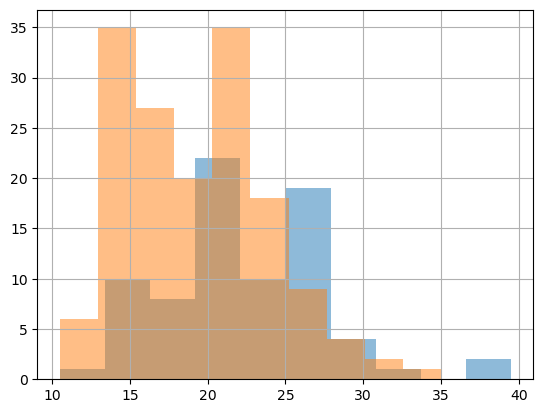

In [135]:
manual['fuel_efficiency'].hist(alpha=.5)
automatic['fuel_efficiency'].hist(alpha=.5)

In [136]:
t, p = stats.ttest_ind(automatic['fuel_efficiency'], manual['fuel_efficiency'], equal_var=False)

if p < alpha:
    print(f'there is a significant difference (pvalue: {p}')
else:
    print(f'there is not a significant difference (pvalue: {p})')

there is a significant difference (pvalue: 1.7952248999917893e-05


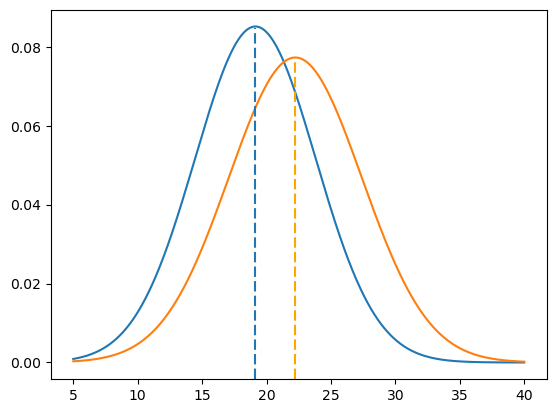

In [137]:
import statistics
from scipy.stats import norm
x_axis = np.arange(5, 40, 0.01)
  
# Calculating mean and standard deviation
mean = statistics.mean(automatic['fuel_efficiency'])
sd = statistics.stdev(automatic['fuel_efficiency'])
  
plt.plot(x_axis, norm.pdf(x_axis, mean, sd))

mean2 = statistics.mean(manual['fuel_efficiency'])
sd2 = statistics.stdev(manual['fuel_efficiency'])
plt.plot(x_axis, norm.pdf(x_axis, mean2, sd2))

plt.axvline(x=mean, ymax=.95, dashes= (5, 2))
plt.axvline(x=mean2, ymax=.87, dashes=(5,2), c='orange')




plt.show()

# Answer with the type of stats test you would use (assume normal distribution):

### Is there a relationship between the length of your arm and the length of your foot?

In [ ]:
#pearsons r test or spearmans

### Do guys and gals quit their jobs at the same rate?

In [ ]:
#indipendent t-test (2-tails)

### Does the length of time of the lecture correlate with a students grade?

In [ ]:
#pearsons r test or spearmans

# Use the telco_churn data.

### Does tenure correlate with monthly charges?

In [203]:
import os
import env

def get_db_url(db, env_file = os.path.exists('env.py')):
    '''
    return a formatted string containing username, password, host, and db for connecting
    to the mySQL server and the database indicated.
    env_file checks to see if the env.py exists in cwd
    '''
    if env_file:
        username, password, host = (env.username, env.password, env.host)
        return f'mysql+pymysql://{username}:{password}@{host}/{db}'
    else:
        return 'You need a username and a password to get in!'
url = get_db_url('employees')

In [166]:
query= query = 'SELECT * FROM customers'

df = pd.read_sql(query, url)
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,device_protection,tech_support,streaming_tv,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,No,Yes,Yes,No,2,Yes,2,65.6,593.3,No
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,No,No,No,Yes,1,No,2,59.9,542.4,No
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,Yes,No,No,No,1,Yes,1,73.9,280.85,Yes
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,Yes,No,Yes,Yes,1,Yes,1,98.0,1237.85,Yes
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,No,Yes,Yes,No,1,Yes,2,83.9,267.4,Yes


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

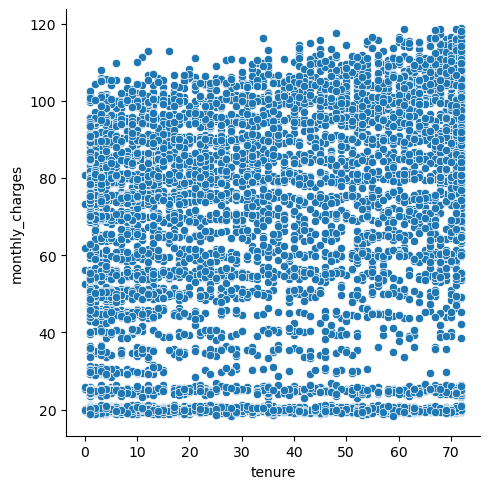

In [143]:
sns.relplot(x='tenure', y='monthly_charges', data=df)

### Ho = there is no linear coorelation between tenure and monthly charges
### Ha = there is a linear coorelation between tenure and monthly charges

In [167]:
corr, p = stats.spearmanr(df['tenure'], df['monthly_charges'])
corr, p
# no correlation

(0.27641678933130215, 1.0271266876409408e-123)

p < .05 - We reject the null hypothesis. There is a linear correlation between tenure and monthly charges.

### Total charges?

In [178]:
df = df[df['total_charges']!=' ']
df['total_charges'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: total_charges
Non-Null Count  Dtype 
--------------  ----- 
7032 non-null   object
dtypes: object(1)
memory usage: 109.9+ KB


In [179]:
df['total_charges'] = df['total_charges'].astype('float')

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

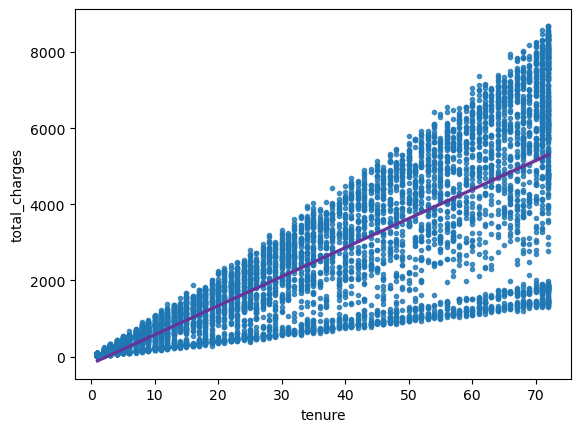

In [180]:
sns.regplot(x='tenure', y='total_charges', data= df, marker= '.', line_kws={'color': 'rebeccapurple'})

In [182]:
corr, p = stats.spearmanr(df['tenure'], df['total_charges'])
corr, p
# there is a strong correlation

(0.8891770805365491, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

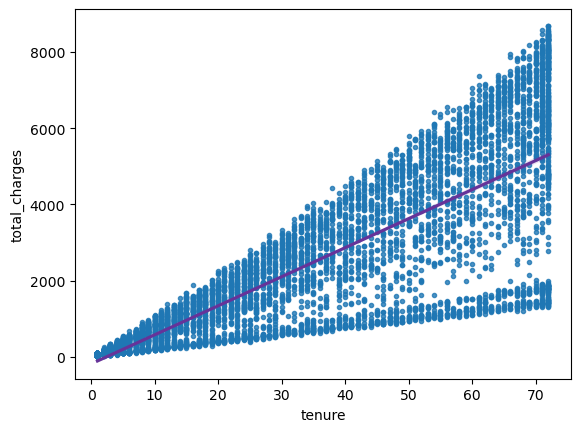

In [149]:
sns.regplot(x='tenure', y='total_charges', data= df, line_kws={'color': 'rebeccapurple'}, marker='.')

### What happens if you control for phone and internet service?

In [185]:
df['internet_service_type_id'].value_counts()

2    3096
1    2416
3    1520
Name: internet_service_type_id, dtype: int64

In [150]:
df['phone_service'].value_counts()

Yes    6352
No      680
Name: phone_service, dtype: int64

In [151]:
phone_yes = df[df['phone_service']=='Yes']
phone_no = df[df['phone_service']=='No']

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

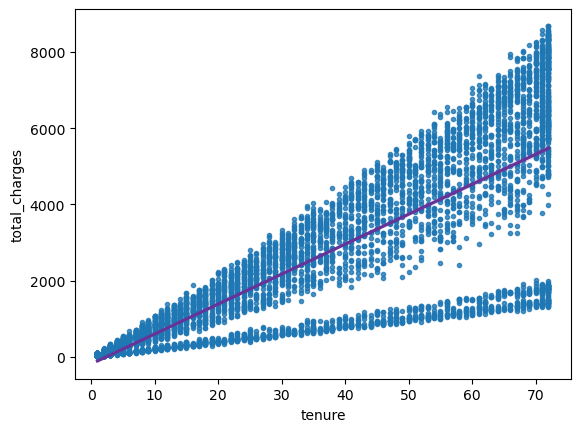

In [152]:
sns.regplot(x='tenure', y='total_charges', data= phone_yes, line_kws={'color': 'rebeccapurple'}, marker='.')

In [187]:
corr, p = stats.spearmanr(phone_yes['tenure'], phone_yes['total_charges'])
corr, p

(0.8861299552593503, 0.0)

<AxesSubplot:xlabel='tenure', ylabel='total_charges'>

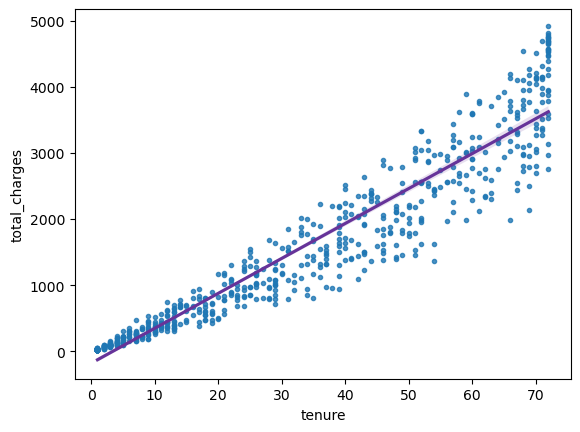

In [154]:
sns.regplot(x='tenure', y='total_charges', data= phone_no, line_kws={'color': 'rebeccapurple'}, marker='.')

In [186]:
corr, p = stats.spearmanr(phone_no['tenure'], phone_no['total_charges'])
corr, p

(0.9792287616113297, 0.0)

# Use the employees database.

### Is there a relationship between how long an employee has been with the company and their salary?

In [159]:
query = 'SELECT * FROM employees JOIN salaries USING(emp_no) JOIN titles USING(emp_no);'

df = pd.read_sql(query, url)
df.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,Senior Engineer,1986-06-26,9999-01-01
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,Senior Engineer,1986-06-26,9999-01-01
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,Senior Engineer,1986-06-26,9999-01-01
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,Senior Engineer,1986-06-26,9999-01-01


In [163]:
empdf = df

In [181]:
empdf.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,Senior Engineer,1986-06-26,9999-01-01
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,Senior Engineer,1986-06-26,9999-01-01
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,Senior Engineer,1986-06-26,9999-01-01
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,Senior Engineer,1986-06-26,9999-01-01


In [194]:
empdf['tenure']=pd.to_datetime('today') - pd.to_datetime(empdf['hire_date'])

empdf['tenure']=empdf['tenure'].astype('str').str.split(' ', expand=True)[0].astype('int')

In [195]:
empdf.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,salary,from_date,to_date,title,from_date,to_date,tenure
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01,13311
1,10001,1953-09-02,Georgi,Facello,M,1986-06-26,62102,1987-06-26,1988-06-25,Senior Engineer,1986-06-26,9999-01-01,13311
2,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66074,1988-06-25,1989-06-25,Senior Engineer,1986-06-26,9999-01-01,13311
3,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66596,1989-06-25,1990-06-25,Senior Engineer,1986-06-26,9999-01-01,13311
4,10001,1953-09-02,Georgi,Facello,M,1986-06-26,66961,1990-06-25,1991-06-25,Senior Engineer,1986-06-26,9999-01-01,13311


<AxesSubplot:xlabel='tenure', ylabel='salary'>

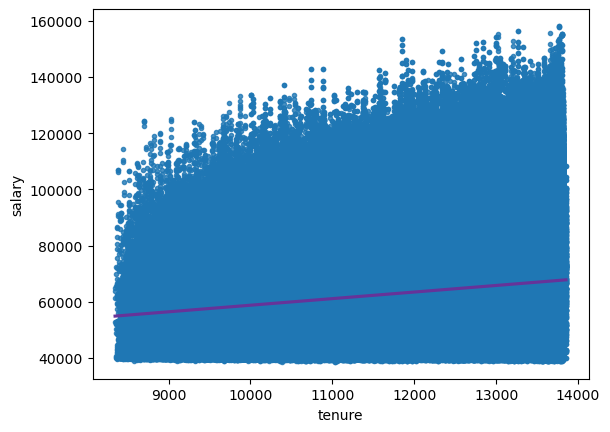

In [198]:
sns.regplot(x='tenure', y='salary', data=empdf, marker='.', line_kws={'color':'rebeccapurple'})

In [201]:
r, p = stats.spearmanr(empdf['tenure'], empdf['salary'])
r, p

(0.14489599742706555, 0.0)

### Is there a relationship between how long an employee has been with the company and the number of titles they have had?

In [202]:
empdf['title'].unique()

array(['Senior Engineer', 'Staff', 'Engineer', 'Senior Staff',
       'Assistant Engineer', 'Technique Leader', 'Manager'], dtype=object)

In [204]:
query = 'SELECT emp_no, count(title), datediff(now(), min(from_date)) AS tenure FROM titles GROUP BY emp_no HAVING max(to_date) = \'9999-01-01\''

df = pd.read_sql(query, url)
df.head()

,emp_no,count(title),tenure
0,10001,1,13311
1,10002,1,9620
2,10003,1,9864
3,10004,2,13153
4,10005,2,12137


<AxesSubplot:xlabel='tenure', ylabel='count(title)'>

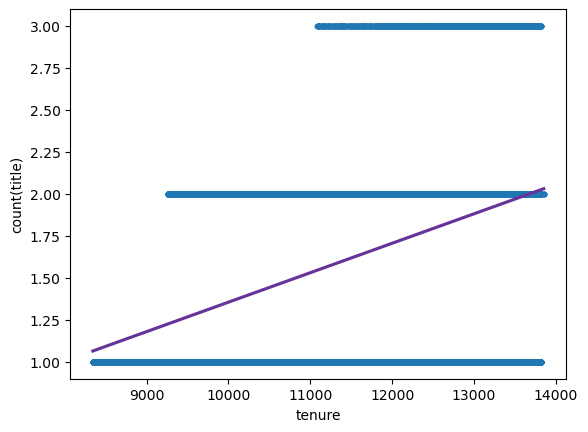

In [205]:
sns.regplot(x='tenure', y='count(title)', data = df, marker='.', line_kws={'color':'rebeccapurple'})

Number of titles is discreet. Run ANOVA or Kruskal Wallis to test avg salary is different with employees with 1, 2, or 3 titles.

In [209]:
df = df.rename(columns={'count(title)': 'num_titles'})
df.head()

,emp_no,num_titles,tenure
0,10001,1,13311
1,10002,1,9620
2,10003,1,9864
3,10004,2,13153
4,10005,2,12137


In [210]:
stats.levene(df['num_titles'], df['tenure'])

LeveneResult(statistic=718602.1569097865, pvalue=0.0)

In [211]:
stats.kruskal(df['num_titles'], df['tenure'])

KruskalResult(statistic=371488.64419334417, pvalue=0.0)

there is a difference in tenure and number of titles an employee has had. 

# Use the sleepstudy data.

### Is there a relationship between days and reaction time?

### Ho- There is no linear relationship between days and reaction time
### Ha- There is a linear relationship between days and reaction time

In [213]:
ssdf = data('sleepstudy')
ssdf.head()

,Reaction,Days,Subject
1,249.5600,0,308
2,258.7047,1,308
3,250.8006,2,308
4,321.4398,3,308
5,356.8519,4,308


In [214]:
ssdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180 entries, 1 to 180
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Reaction  180 non-null    float64
 1   Days      180 non-null    int64  
 2   Subject   180 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 5.6 KB


<AxesSubplot:xlabel='Days', ylabel='Reaction'>

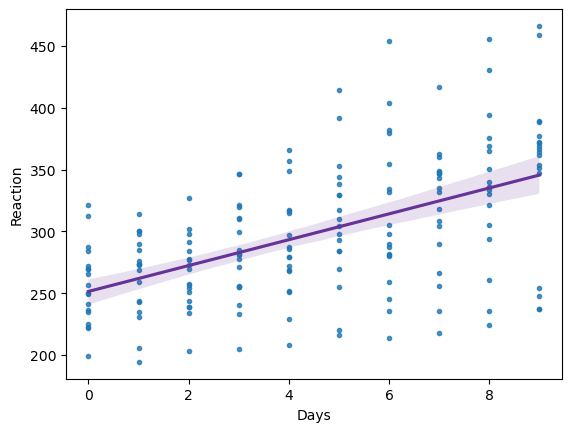

In [216]:
sns.regplot(x=ssdf['Days'], y=ssdf['Reaction'], marker='.',data = ssdf, line_kws= {'color':'rebeccapurple'})

<AxesSubplot:>

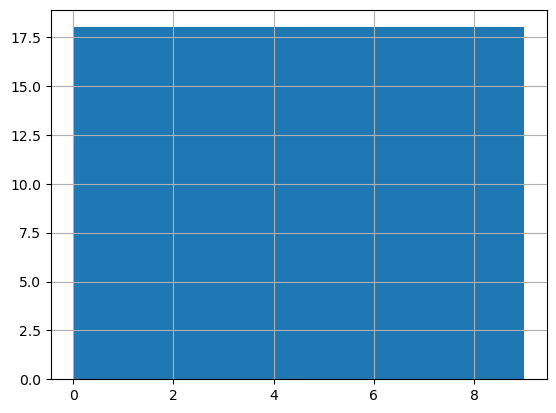

In [217]:
ssdf['Days'].hist()

<AxesSubplot:>

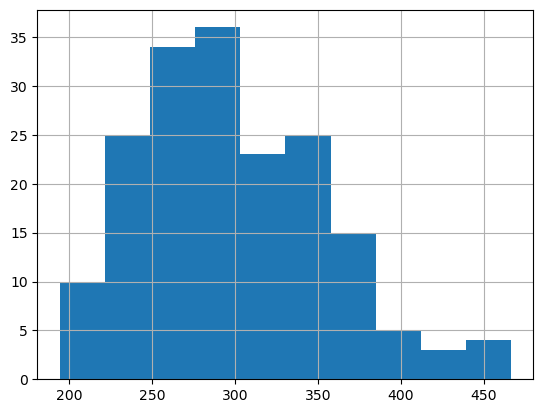

In [219]:
ssdf['Reaction'].hist()

In [220]:
stats.spearmanr(ssdf['Days'], ssdf['Reaction'])

SpearmanrResult(correlation=0.5228138502259547, pvalue=5.132878057706873e-14)

There is a moderate coorelation between days and reaction time. Reject the null hypothesis.

# Answer with the type of stats test you would use (assume normal distribution):

## Do students get better test grades if they have a rubber duck on their desk?

In [226]:
# Chi2 test

## Does smoking affect when or not someone has lung cancer?

In [ ]:
# Chi2 test

## Is gender independent of a person’s blood type?

In [ ]:
# Chi2 test

## A farming company wants to know if a new fertilizer has improved crop yield or not

In [ ]:
# Chi2 test

## Does the length of time of the lecture correlate with a students grade?

In [ ]:
# Chi2 test

## Do people with dogs live in apartments more than people with cats?

In [ ]:
# Chi2 test

## Use the following contingency table to help answer the question of whether using a macbook and being a codeup student are independent of each other.

In [224]:
d = {'codeup_student':[49,1], 'not_codeup_student':[20,30]}
cddf=pd.DataFrame(data = d, index=('uses_a_macbook', 'doesn\'t_use_a_macbook'))
cddf

,codeup_student,not_codeup_student
uses_a_macbook,49,20
doesn't_use_a_macbook,1,30


In [231]:
chi2, p, df, expected = stats.chi2_contingency(cddf)
p

1.4116760526193828e-09

In [230]:
print('observed values\n')
print(cddf.values)
print('-------\nexpected values\n')
print(expected.astype(int))
print('-------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'pvalue = {p:.4f}')

observed values

[[49 20]
 [ 1 30]]
-------
expected values

[[34 34]
 [15 15]]
-------

chi^2 = 36.6526
pvalue = 0.0000


## Choose another 2 categorical variables from the mpg dataset and perform a chi2 contingency table test with them. Be sure to state your null and alternative hypotheses.

#### Ho- The number of cylinders is independent from the year of make
#### Ha- The number of cylinders is dependent on the year of make

In [232]:
mpg = data('mpg')
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [235]:
mpg_year = pd.crosstab(mpg['year'], mpg['cyl'])
mpg_year

cyl,4,5,6,8
year,,,,
1999,45,0,45,27
2008,36,4,34,43


In [237]:
chi2, p, df, expected = stats.chi2_contingency(mpg_year)

In [238]:
print('observed values\n')
print(mpg_year.values)
print('-------\nexpected values\n')
print(expected.astype(int))
print('-------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'pvalue = {p:.4f}')

observed values

[[45  0 45 27]
 [36  4 34 43]]
-------
expected values

[[40  2 39 35]
 [40  2 39 35]]
-------

chi^2 = 10.1888
pvalue = 0.0170


**takeaway** 
there exists some relationship between the make year and number of cylinders.

---------------------------------------------------------------

#### Ho- The number of cylinders is independent from the manufacturer
#### Ha- The number of cylinders is dependent on the manufacturer

In [245]:
mpg_m = pd.crosstab(mpg['manufacturer'], mpg['cyl'])
mpg_m

cyl,4,5,6,8
manufacturer,,,,
audi,8,0,9,1
chevrolet,2,0,3,14
dodge,1,0,15,21
ford,0,0,10,15
honda,9,0,0,0
hyundai,8,0,6,0
jeep,0,0,3,5
land rover,0,0,0,4
lincoln,0,0,0,3


In [249]:
chi2, p, df, expected = stats.chi2_contingency(mpg_m)
p

4.0518621792685397e-22

In [248]:
print('observed values\n')
print(mpg_m.values)
print('-------\nexpected values\n')
print(expected.astype(int))
print('-------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'pvalue = {p:.4f}')

observed values

[[ 8  0  9  1]
 [ 2  0  3 14]
 [ 1  0 15 21]
 [ 0  0 10 15]
 [ 9  0  0  0]
 [ 8  0  6  0]
 [ 0  0  3  5]
 [ 0  0  0  4]
 [ 0  0  0  3]
 [ 0  0  2  2]
 [ 4  0  8  1]
 [ 0  0  4  1]
 [14  0  0  0]
 [18  0 13  3]
 [17  4  6  0]]
-------
expected values

[[ 6  0  6  5]
 [ 6  0  6  5]
 [12  0 12 11]
 [ 8  0  8  7]
 [ 3  0  3  2]
 [ 4  0  4  4]
 [ 2  0  2  2]
 [ 1  0  1  1]
 [ 1  0  1  0]
 [ 1  0  1  1]
 [ 4  0  4  3]
 [ 1  0  1  1]
 [ 4  0  4  4]
 [11  0 11 10]
 [ 9  0  9  8]]
-------

chi^2 = 198.1175
pvalue = 0.0000


**Takeaway** There exists some relationship between manufacturer and number of cylinders

# Use the data from the employees database to answer these questions:

## Is an employee's gender independent of whether an employee works in sales or marketing? (only look at current employees)

#### Ho- The gender is independent from the department
#### Ha- The gender is dependent on the department

In [252]:
query = 'SELECT emp_no, gender, dept_name FROM employees JOIN dept_emp USING(emp_no) JOIN departments USING (dept_no)'

emp_g = pd.read_sql(query, url)
emp_g.head()

,emp_no,gender,dept_name
0,10011,F,Customer Service
1,10038,M,Customer Service
2,10049,F,Customer Service
3,10060,M,Customer Service
4,10088,F,Customer Service


In [251]:
emp_g['gender'].value_counts()

M    266084
F    177224
Name: gender, dtype: int64

In [254]:
sm = emp_g[(emp_g['dept_name'] == 'Sales') | (emp_g['dept_name'] == 'Marketing')]
sm.value_counts()

emp_no  gender  dept_name
10002   F       Sales        1
400522  F       Sales        1
400556  M       Marketing    1
400540  F       Sales        1
400539  F       Sales        1
                            ..
200618  M       Sales        1
200620  M       Marketing    1
200621  M       Sales        1
200622  F       Marketing    1
499992  F       Marketing    1
Length: 72456, dtype: int64

In [259]:
smdf = pd.crosstab(sm['gender'], sm['dept_name'])
smdf

dept_name,Marketing,Sales
gender,,
F,8037,20854
M,12174,31391


In [260]:
chi2, p, df, expected = stats.chi2_contingency(smdf)

In [261]:
print('observed values\n')
print(smdf.values)
print('-------\nexpected values\n')
print(expected.astype(int))
print('-------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'pvalue = {p:.4f}')

observed values

[[ 8037 20854]
 [12174 31391]]
-------
expected values

[[ 8058 20832]
 [12152 31412]]
-------

chi^2 = 0.1311
pvalue = 0.7173


**Takeaway** There exists no relationship between gender and department

## Is an employee's gender independent of whether or not they are or have been a manager?

#### Ho- gender is independent from if you are a manager or not
#### Ho- being a manager is dependent on gender

In [262]:
query = 'SELECT emp_no, gender, title FROM employees JOIN titles USING(emp_no)'

emp_man = pd.read_sql(query, url)
emp_man.head()

,emp_no,gender,title
0,10001,M,Senior Engineer
1,10002,F,Staff
2,10003,M,Senior Engineer
3,10004,M,Engineer
4,10004,M,Senior Engineer


In [263]:
managers = emp_man[emp_man['title'] == 'Manager']
managers

,emp_no,gender,title
148135,110022,M,Manager
148137,110039,M,Manager
148139,110085,M,Manager
148141,110114,F,Manager
148143,110183,F,Manager
148145,110228,F,Manager
148147,110303,F,Manager
148149,110344,F,Manager
148152,110386,M,Manager
148155,110420,M,Manager


In [264]:
managers_gender = pd.crosstab(managers['gender'], managers['title'])
managers_gender

title,Manager
gender,
F,13
M,11


In [265]:
chi2, p, df, expected = stats.chi2_contingency(managers_gender)

In [266]:
print('observed values\n')
print(managers_gender.values)
print('-------\nexpected values\n')
print(expected.astype(int))
print('-------\n')
print(f'chi^2 = {chi2:.4f}')
print(f'pvalue = {p:.4f}')

observed values

[[13]
 [11]]
-------
expected values

[[13]
 [11]]
-------

chi^2 = 0.0000
pvalue = 1.0000


**Takeaway** Being a manager is independent of gender.